In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
# Step 1: Import the dataset
data = pd.read_csv("machine_data.csv")

In [27]:
# Step 2: Data preprocessing
# Encode the categorical column 'vendor' using label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['vendor'] = le.fit_transform(data['vendor'])
# Identify vendors with less than 5 CPUs and drop rows corresponding to those vendors
vendor_counts = data['vendor'].value_counts()
vendors_to_drop = vendor_counts[vendor_counts < 5].index
data = data[~data['vendor'].isin(vendors_to_drop)]
# Drop the column 'model'
data = data.drop('model', axis=1)

In [28]:
# Step 3: Select 'score' as the target variable and remaining features as predictors
X = data.drop('score', axis=1)
y = data['score']

In [29]:
# Step 4: Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Step 5: Model building
# a. Build a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# b. Find the train and test scores for the built model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

# c. Calculate the adjusted R-squared values
n = X_train.shape[0]
p = X_train.shape[1]
r2_train = 1 - (1 - train_score) * ((n - 1) / (n - p - 1))
r2_test = 1 - (1 - test_score) * ((n - 1) / (n - p - 1))

# Display the results
print("Train Score:", train_score)
print("Test Score:", test_score)
print("Adjusted R-squared (Train):", r2_train)
print("Adjusted R-squared (Test):", r2_test)

Train Score: 0.9047323244547552
Test Score: 0.37583821955825647
Adjusted R-squared (Train): 0.9000360305898487
Adjusted R-squared (Test): 0.3450696810857762


In [44]:
# Step 6: Calculate the VIF values
def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

vif_values = calculate_vif(X_train)
print("VIF Values:")
print(vif_values)

VIF Values:
      Features       VIF
0       vendor  2.454173
1   cycle_time  1.454746
2   min_memory  5.377506
3   max_memory  7.935768
4        cache  3.077655
5  min_threads  3.361677
6  max_threads  3.286946


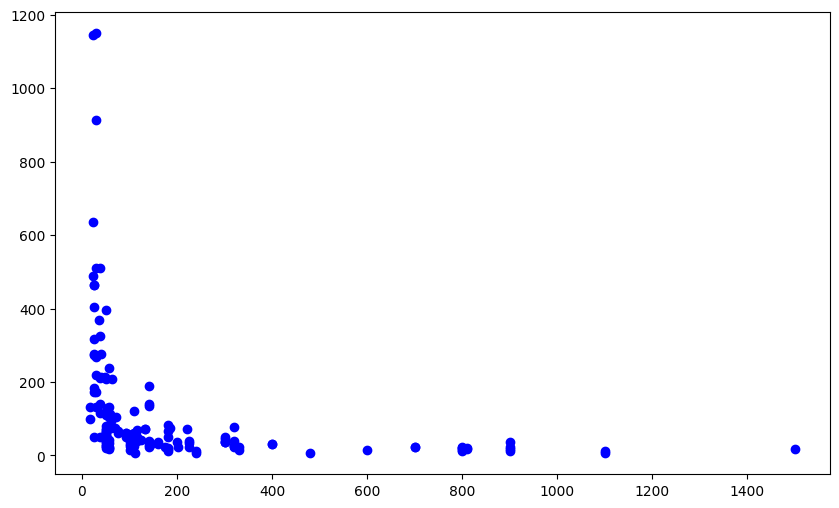

In [32]:
# Step 7: Plot the regression lines for training set
plt.figure(figsize=(10, 6))
plt.scatter(X_train['cycle_time'], y_train, color='blue', label='Training Data')

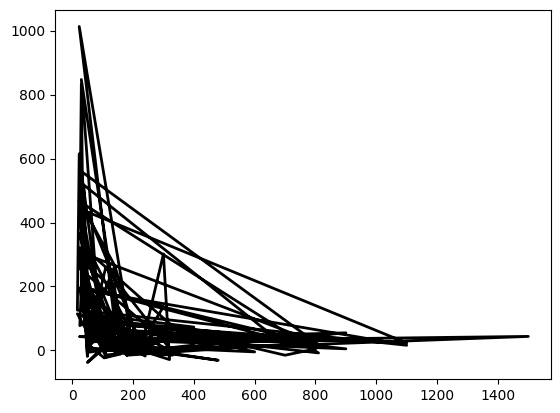

In [47]:
# Plot the regression line for training data
plt.plot(X_train['cycle_time'], model.predict(X_train), color='black', linewidth=2, label='Regression Line (Train)')

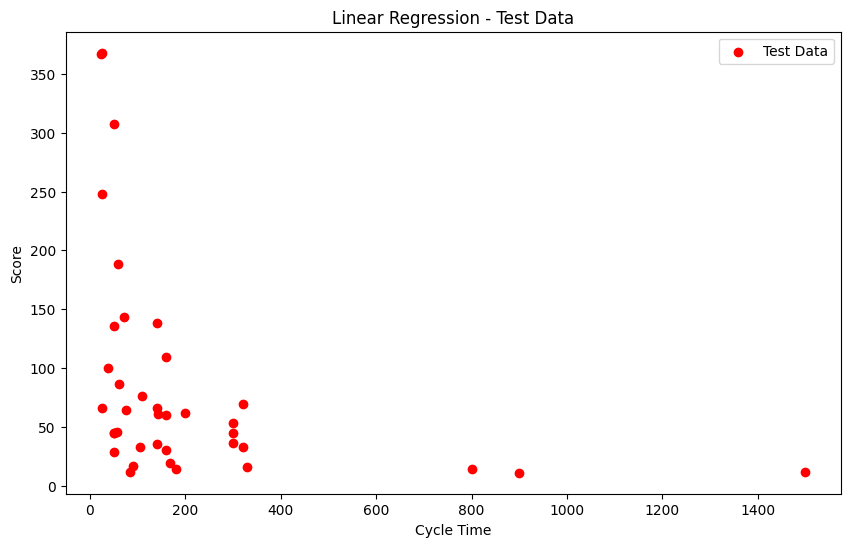

In [36]:
# Step 8: Plot the regression lines for test set
plt.figure(figsize=(10, 6))
plt.scatter(X_test['cycle_time'], y_test, color='red', label='Test Data')
plt.title('Linear Regression - Test Data')
plt.xlabel('Cycle Time')
plt.ylabel('Score')
plt.legend()
plt.show()

In [38]:
# Step 9: Create a DataFrame to store the results
results = pd.DataFrame({
    'Train Score': [train_score],
    'Test Score': [test_score],
    'Adjusted R2 (Train)': [r2_train],
    'Adjusted R2 (Test)': [r2_test]
})

print(results)

   Train Score  Test Score  Adjusted R2 (Train)  Adjusted R2 (Test)
0     0.904732    0.375838             0.900036             0.34507


In [40]:
# Step 10: Predict the performance score of new CPU instances
new_cpu_instances = pd.DataFrame({
    'vendor': [14, 0, 0, 0, 0, 0],
    'cycle_time': [125, 29, 29, 29, 29, 26],
    'min_memory': [256, 8000, 8000, 8000, 16000, 32000],
    'max_memory': [6000, 32000, 32000, 32000, 16000, 64000],
    'cache': [256, 32, 32, 32, 32, 64],
    'min_threads': [16, 8, 8, 8, 8, 8],
    'max_threads': [128, 32, 32, 32, 16, 32]
})
predicted_scores = model.predict(new_cpu_instances)
print(predicted_scores)

[378.13105189 305.01774892 305.01774892 305.01774892 347.0115121
 921.80905215]


In [43]:
# Display the predicted scores for new CPU instances
print("\nPredicted Scores for New CPU Instances:")
print(new_cpu_instances)


Predicted Scores for New CPU Instances:
   vendor  cycle_time  min_memory  max_memory  cache  min_threads  max_threads
0      14         125         256        6000    256           16          128
1       0          29        8000       32000     32            8           32
2       0          29        8000       32000     32            8           32
3       0          29        8000       32000     32            8           32
4       0          29       16000       16000     32            8           16
5       0          26       32000       64000     64            8           32
